In [11]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [12]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [13]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 500
ESTIMATION_WINDOW = 3 * 365

ESTIMATOR = CovEstimators.MA.value(shrinkage_type="linear")

In [14]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [15]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [01:31<00:00,  3.11it/s]


StrategyStatistics:
* final_nav = 4.879428
* geom_avg_total_r = 0.086940
* geom_avg_xs_r = 0.058655
* std_xs_r = 0.157655
* min_xs_r = -0.121646
* max_xs_r = 0.105488
* skew = -0.577436
* kurtosis = 17.640368
* max_dd = -0.415826
* sharpe = 0.372048
* alpha_buy_hold = 0.009368
* tracking_error_buy_hold = 0.191076
* ir_buy_hold = 0.049029
* factor_loadings = {'low_risk': 0.38085057497681396, 'momentum': -0.03786394772218342, 'quality': 0.09621706204098837, 'size': 0.13934801546504128, 'value': -0.2235336846860677, 'spx': 0.5243700131236841}
* alpha_benchmark = 0.019482
* alpha_benchmark_pvalue = 0.376307
* tracking_error_benchmark = 0.131493
* ir_benchmark = 0.148159
* ttest_pval = 0.513501
* levene_pval = 0.000000
* timing_ability_coef = -0.073938
* timing_ability_pval = 0.000662

In [16]:
result.std_xs_r, result.sharpe

(0.15765531319571047, 0.372047909759941)

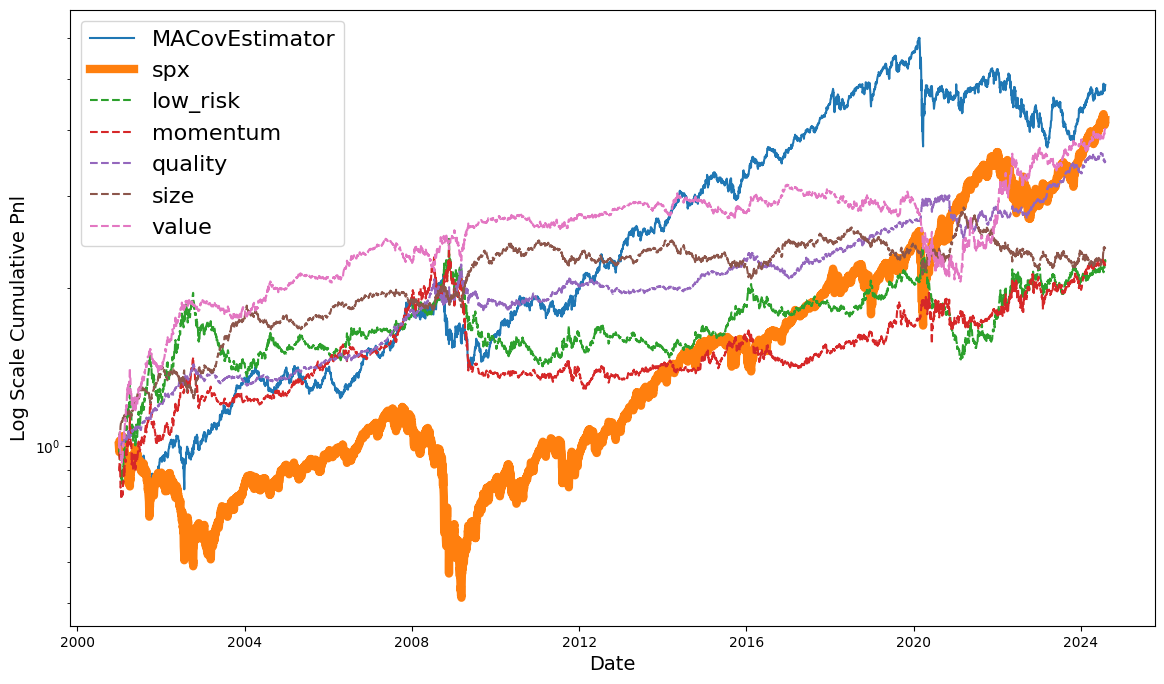

In [17]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

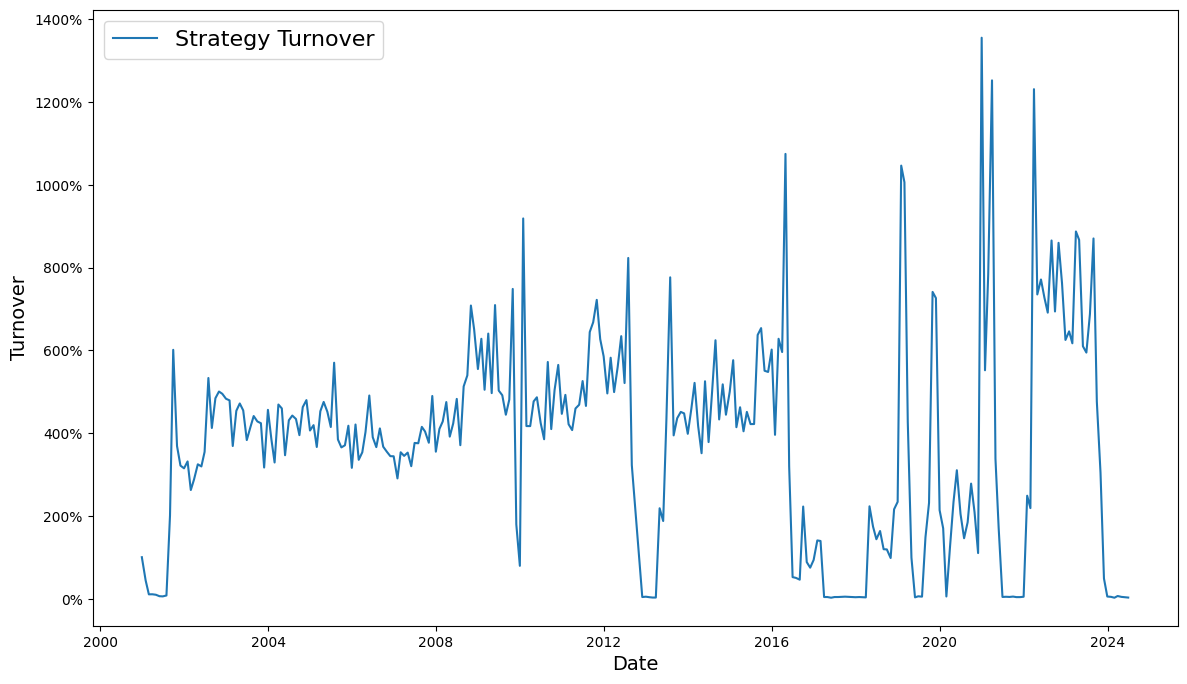

In [18]:
runner.plot_turnover()

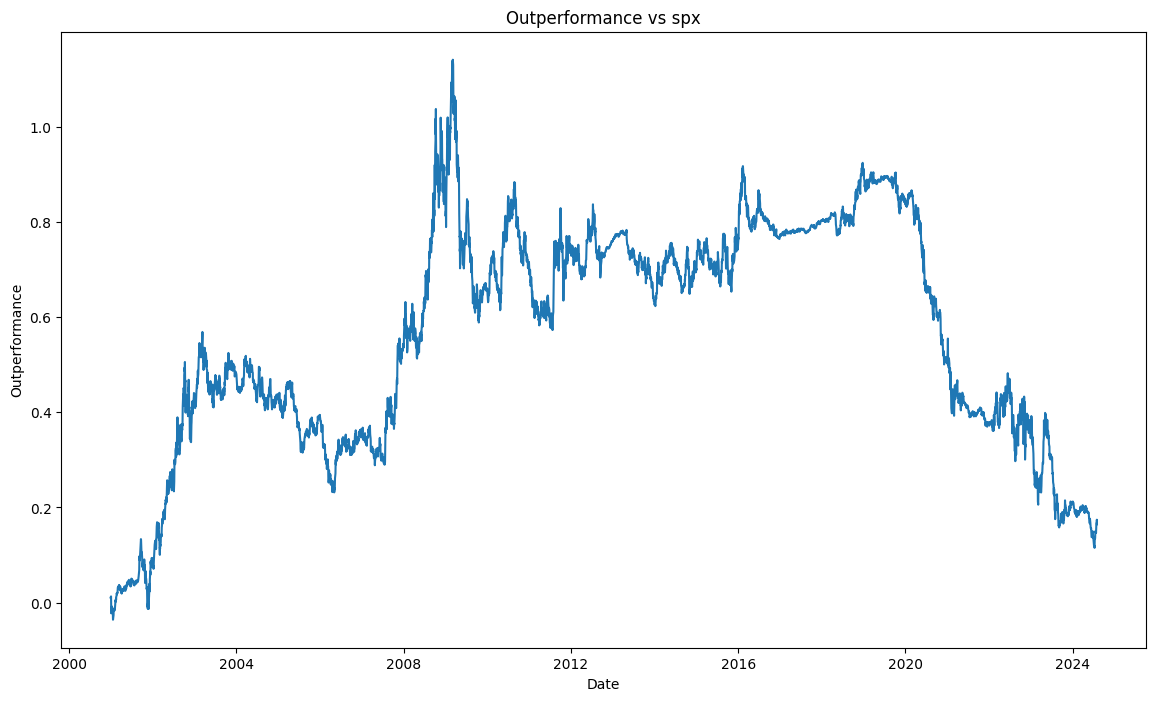

In [19]:
runner.plot_outperformance(mkt_only=True)

In [20]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")